In [1]:
from sklearn.experimental import enable_iterative_imputer
import pandas as pd
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from minisom import MiniSom  
import numpy as np
from matplotlib.patches import Patch
from colour import Color
from matplotlib.patches import Patch

In [2]:
country_codes = {'Afghanistan': 'AF',
 'Albania': 'AL',
 'Algeria': 'DZ',
 'Angola': 'AO',
 'Andorra': 'AD',
 'Argentina': 'AR',
 'Armenia': 'AM',
 'Australia': 'AU',
 'Austria': 'AT',
 'Azerbaijan': 'AZ',
 'Bahrain': 'BH',
 'Bangladesh': 'BD',
 'Belarus': 'BY',
 'Belgium': 'BE',
 'Benin': 'BJ',
 'Bhutan': 'BT',
 'Bolivia': 'BO',
 'Bosnia and Herzegovina': 'BA',
 'Botswana': 'BW',
 'Brazil': 'BR',
 'Brunei Darussalam': 'BN',
 'Bulgaria': 'BG',
 'Burkina Faso': 'BF',
 'Burundi': 'BI',
 'Cambodia': 'KH',
 'Cameroon': 'CM',
 'Canada': 'CA',
 'Cape Verde': 'CV',
 'Central African Republic': 'CF',
 'Chad': 'TD',
 'Chile': 'CL',
 'China': 'CN',
 'Colombia': 'CO',
 'Comoros': 'KM',
 'Costa Rica': 'CR',
 'Croatia': 'HR',
 'Cuba': 'CU',
 'Cyprus': 'CY',
 'Czech Republic': 'CZ',
 'Democratic Republic of the Congo': 'CD',
 'Denmark': 'DK',
 'Djibouti': 'DJ',
 'Dominican Republic': 'DO',
 'Ecuador': 'EC',
 'Egypt': 'EG',
 'El Salvador': 'SV',
 'Equatorial Guinea': 'GQ',
 'Eritrea': 'ER',
 'Estonia': 'EE',
 'Ethiopia': 'ET',
 'Fiji': 'FJ',
 'Finland': 'FI',
 'France': 'FR',
 'Gabon': 'GA',
 'Gambia': 'GM',
 'Georgia': 'GE',
 'Germany': 'DE',
 'Ghana': 'GH',
 'Greece': 'GR',
 'Guatemala': 'GT',
 'Guinea': 'GN',
 'Guinea-Bissau': 'GW',
 'Guyana': 'GY',
 'Haiti': 'HT',
 'Honduras': 'HN',
 'Hong Kong': 'HK',
 'Hong Kong, China (SAR)': 'HK',
 'Hungary': 'HU',
 'Iceland': 'IS',
 'India': 'IN',
 'Indonesia': 'ID',
 'Iran': 'IR',
 'Iraq': 'IQ',
 'Ireland': 'IE',
 'Israel': 'IL',
 'Italy': 'IT',
 'Ivory Coast': 'IC',
 'Jamaica': 'JM',
 'Japan': 'JP',
 'Jordan': 'JO',
 'Kazakhstan': 'KZ',
 'Kenya': 'KE',
 'Korea (Republic of)': 'KR',
 'Kuwait': 'KW',
 'Kyrgyzstan': 'KG',
 'Laos': 'LA',
 'Latvia': 'LV',
 'Lebanon': 'LB',
 'Lesotho': 'LS',
 'Liberia': 'LR',
 'Libya': 'LY',
 'Liechtenstein': 'LI',
 'Lithuania': 'LT',
 'Luxembourg': 'LU',
 'Macedonia': 'MK',
 'Madagascar': 'MG',
 'Malawi': 'MW',
 'Malaysia': 'MY',
 'Mali': 'ML',
 'Malta': 'MT',
 'Mauritania': 'MR',
 'Mauritius': 'MU',
 'Mexico': 'MX',
 'Moldova': 'MD',
 'Mongolia': 'MN',
 'Montenegro': 'ME',
 'Morocco': 'MA',
 'Mozambique': 'MZ',
 'Myanmar': 'MM',
 'Namibia': 'NA',
 'Nepal': 'NP',
 'Netherlands': 'NL',
 'New Zealand': 'NZ',
 'North Macedonia': 'NM',
 'Nicaragua': 'NI',
 'Niger': 'NE',
 'Nigeria': 'NG',
 'North Korea': 'KP',
 'Norway': 'NO',
 'Oman': 'OM',
 'Pakistan': 'PK',
 'Palestine': 'PS',
 'Panama': 'PA',
 'Papua New Guinea': 'PG',
 'Paraguay': 'PY',
 'Peru': 'PE',
 'Philippines': 'PH',
 'Poland': 'PL',
 'Portugal': 'PT',
 'Qatar': 'QA',
 'Republic of China (Taiwan)': 'TW',
 'Republic of the Congo': 'CG',
 'Romania': 'RO',
 'Russia': 'RU',
 'Rwanda': 'RW',
 'Saudi Arabia': 'SA',
 'Senegal': 'SN',
 'Serbia': 'RS',
 'Sierra Leone': 'SL',
 'Singapore': 'SG',
 'Slovakia': 'SK',
 'Slovenia': 'SI',
 'South Africa': 'ZA',
 'South Korea': 'KR',
 'Spain': 'ES',
 'Sri Lanka': 'LK',
 'Sudan': 'SD',
 'Suriname': 'SR',
 'Swaziland': 'SZ',
 'Sweden': 'SE',
 'Switzerland': 'CH',
 'Syria': 'SY',
 'Tajikistan': 'TJ',
 'Tanzania': 'TZ',
 'Thailand': 'TH',
 'Timor-Leste': 'TL',
 'Togo': 'TG',
 'Trinidad and Tobago': 'TT',
 'Tunisia': 'TN',
 'Turkey': 'TR',
 'Turkmenistan': 'TM',
 'Uganda': 'UG',
 'Ukraine': 'UA',
 'United Arab Emirates': 'AE',
 'United Kingdom': 'GB',
 'United States': 'US',
 'Uruguay': 'UY',
 'Uzbekistan': 'UZ',
 'Venezuela': 'VE',
 'Vietnam': 'VN',
 'Yemen': 'YE',
 'Zambia': 'ZM',
 'Zimbabwe': 'ZW',
 'Russian Federation': 'RU',
 'Barbados': 'BB',
 'Bahamas': 'BS',
 'Antigua and Barbuda': 'AG',
 'Seychelles': 'SC',
 'Iran (Islamic Republic of)': 'IR',
 'Venezuela (Bolivarian Republic of)': 'VE',
 'The former Yugoslav Republic of Macedonia': 'MK',
 'Saint Vincent and the Grenadines': 'VC',
 "Lao People's Democratic Republic": 'LA',
 'Palestine, State of': 'PS',
 'Viet Nam': 'VN',
 'Cabo Verde': 'CV',
 'Kiribati': 'KI',
 'Micronesia (Federated States of)': 'FM',
 'Syrian Arab Republic': 'SY',
 'Vanuatu'  : 'VU',
 'Sao Tome and Principe': 'ST',
 'Tanzania (United Republic of)': 'TZ',
'Solomon Islands'  : 'SB',
"Côte d'Ivoire": 'CI',
'Congo (Democratic Republic of the)': 'CD',
'South Sudan': 'SS',
'Somalia': 'SO',
'Saint Kitts and Nevis': 'KN',
'Grenada': 'GD',
'Dominica': 'DM',
"Korea (Democratic People's Rep. of)": 'KP',
'Marshall Islands': 'MH',
'San Marino': 'SM',
'Saint Lucia': 'LC',
'Maldives': 'MV',
'Moldova (Republic of)': 'MD',
'Bolivia (Plurinational State of)': 'BO',
'Palau': 'PW',
'Monaco': 'MC',
'Nauru': 'NR',
'Tuvalu': 'TV',
'Tonga': 'TO',
'Belize': 'BZ',
'Samoa': 'WS',
'Congo': 'CG',}

In [3]:
def impute(data, strategy = 'Interactive'):
    if strategy == 'Interactive':
        imp = IterativeImputer(random_state=0)
        imp.fit(data.iloc[:,2:])

        return imp.transform(data.iloc[:,2:])
    
    elif strategy == 'Delete_rows':
        return np.array(data.iloc[:,2:].dropna(axis = 0))
    
    elif strategy == 'Delete_columns':
        return np.array(data.iloc[:,2:].dropna(axis = 1))
    else:
        imp = SimpleImputer(missing_values=np.nan, strategy=strategy)
        imp.fit(data.iloc[:,2:])
        return imp.transform(data.iloc[:,2:])
    
def shorten_country(c):
    if len(c) > 10:
        return country_codes[c]
    else:
        return c
    
def SOM(s_col, s_row, data_imp, sigma = 1, learning_rate = 5, maxiter = 100000):
    som = MiniSom(s_col, s_row, data_imp.shape[1], 
                  neighborhood_function='gaussian',
                  activation_distance='euclidean', 
                  sigma=sigma,
                  random_seed=1, 
                  learning_rate=learning_rate) 
    som.pca_weights_init(data_imp)
    som.train(data_imp, maxiter, verbose = True) 

    return som

In [4]:
data = pd.read_csv("Data/HDI.csv", index_col = 0)

In [5]:
category_color = {'0 - 20 %' : 'C0',
                  '20 - 40 %' : 'C1',
                  '40 - 60 %' : 'C2',
                  '60 - 80 %' : 'C3',
                  '80 - 100 %' : 'C4'}

In [6]:
N_clusters = 5
s_col = 30
s_row = 20

 [ 100000 / 100000 ] 100% - 0:00:00 left 
 quantization error: 4.966802040802695


c:\Users\Guilherme\Anaconda3\lib\site-packages\minisom.py:536: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)


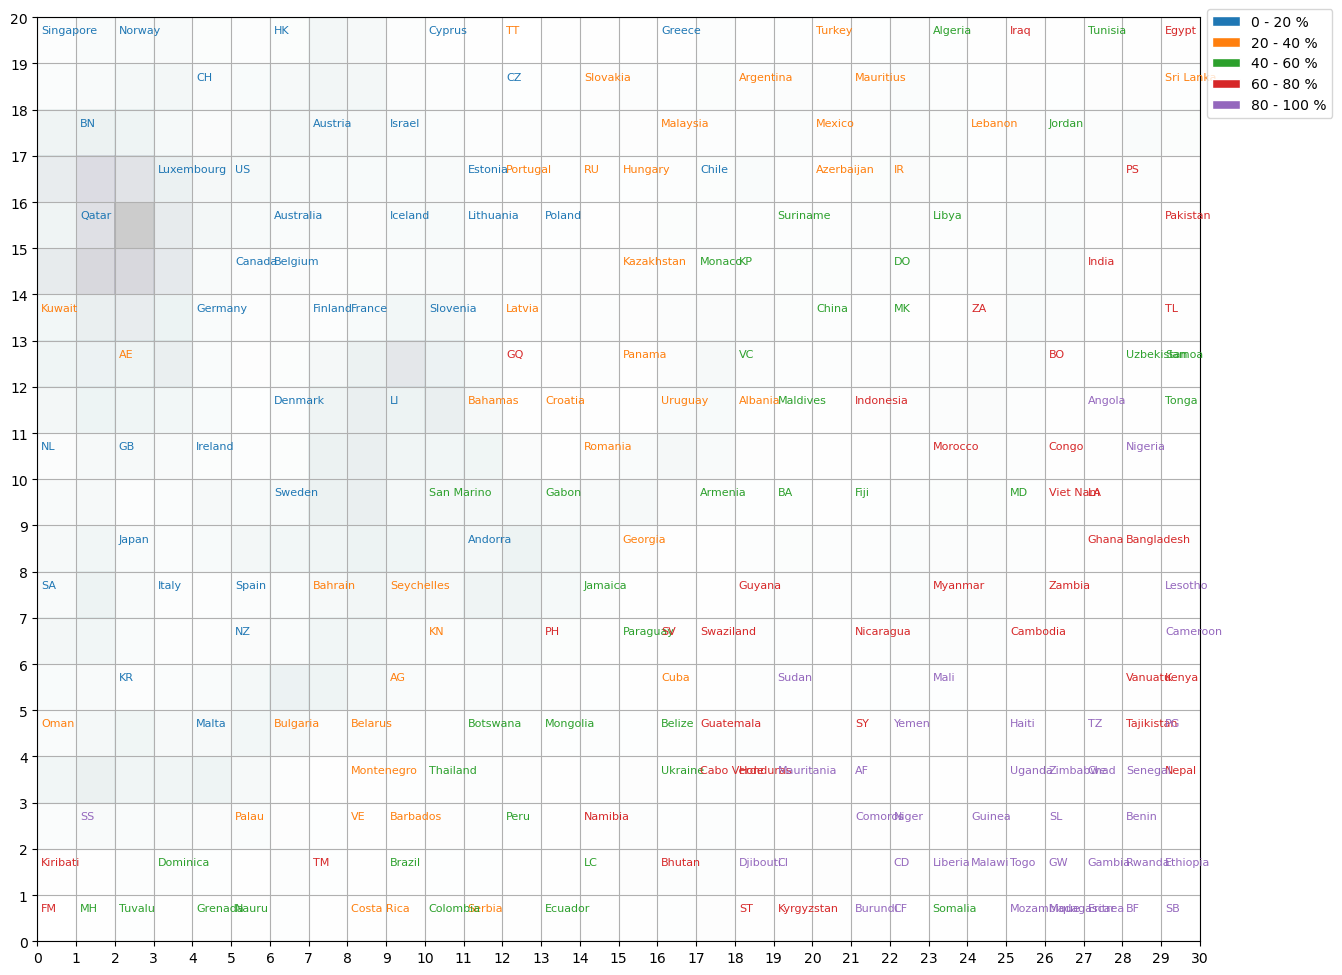

In [7]:
## Strategy - Mean

data_imp = impute(data, "mean")

target = (pd.DataFrame(data_imp).sort_values(1, ascending = False)[0].rank(method = 'min') - 1)//(len(data_imp)/N_clusters)+1

som = SOM(s_col, s_row, data_imp.T[2:].T)

country_map  = som.labels_map(data_imp.T[2:].T, data.iloc[:,1])

label_names = np.linspace(1,N_clusters, N_clusters).astype(str)
colors = ['C0', 'C1', 'C2', 'C3', 'C4']

HDI_Rank = data.join(pd.DataFrame(data_imp)[0])[['Country', 0]]
HDI_Rank['Cluster'] = (HDI_Rank.sort_values(0, ascending = True)[0].rank(method = 'min') - 1)//(len(data_imp)/N_clusters)+1

colors_dict = {c: str(colors[dm]) for c, dm in zip(HDI_Rank['Country'],
                                                (HDI_Rank['Cluster']).astype(int)-1)}

plt.figure(figsize=(15, 12))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha = 0.2)
for p, countries in country_map.items():
    countries = list(countries)
    x = p[0] + .1
    y = p[1] - .3
    for i, c in enumerate(countries):
        off_set = (i+1)/len(countries) - 0.05
        plt.text(x, y+off_set, shorten_country(c), color=colors_dict[c], 
                 fontsize=8)

plt.xticks(np.arange(s_col+1))
plt.yticks(np.arange(s_row+1))

plt.grid()

legend_elements = [Patch(facecolor=clr,
                         edgecolor='w',
                         label=l) for l, clr in category_color.items()]
plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, .95))

plt.savefig("Figures/SOM_Mean.pdf", format="pdf", bbox_inches = "tight")

 [ 100000 / 100000 ] 100% - 0:00:00 left 
 quantization error: 4.987792280422762


c:\Users\Guilherme\Anaconda3\lib\site-packages\minisom.py:536: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)


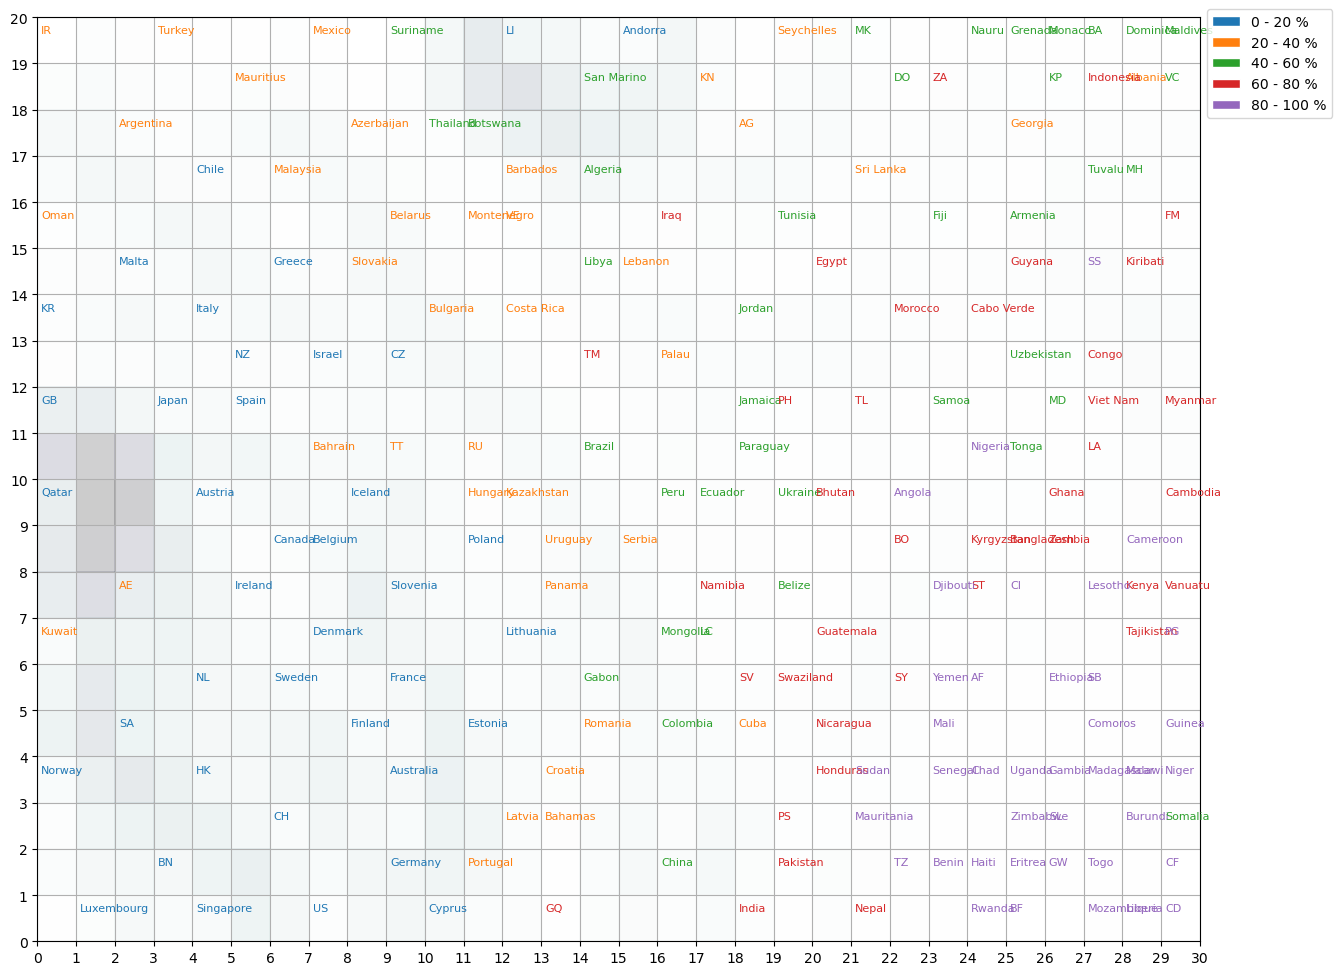

In [8]:
## Strategy - Median

data_imp = impute(data, "median")

target = (pd.DataFrame(data_imp).sort_values(1, ascending = False)[0].rank(method = 'min') - 1)//(len(data_imp)/N_clusters)+1

som = SOM(s_col, s_row, data_imp.T[2:].T)

country_map  = som.labels_map(data_imp.T[2:].T, data.iloc[:,1])

label_names = np.linspace(1,N_clusters, N_clusters).astype(str)
colors = ['C0', 'C1', 'C2', 'C3', 'C4']

HDI_Rank = data.join(pd.DataFrame(data_imp)[0])[['Country', 0]]
HDI_Rank['Cluster'] = (HDI_Rank.sort_values(0, ascending = True)[0].rank(method = 'min') - 1)//(len(data_imp)/N_clusters)+1

colors_dict = {c: str(colors[dm]) for c, dm in zip(HDI_Rank['Country'],
                                                (HDI_Rank['Cluster']).astype(int)-1)}

plt.figure(figsize=(15, 12))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha = 0.2)
for p, countries in country_map.items():
    countries = list(countries)
    x = p[0] + .1
    y = p[1] - .3
    for i, c in enumerate(countries):
        off_set = (i+1)/len(countries) - 0.05
        plt.text(x, y+off_set, shorten_country(c), color=colors_dict[c], 
                 fontsize=8)

plt.xticks(np.arange(s_col+1))
plt.yticks(np.arange(s_row+1))

plt.grid()

legend_elements = [Patch(facecolor=clr,
                         edgecolor='w',
                         label=l) for l, clr in category_color.items()]
plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, .95))

plt.savefig("Figures/SOM_Median.pdf", format="pdf", bbox_inches = "tight")

 [ 100000 / 100000 ] 100% - 0:00:00 left 
 quantization error: 5.633142105620512


c:\Users\Guilherme\Anaconda3\lib\site-packages\minisom.py:536: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)


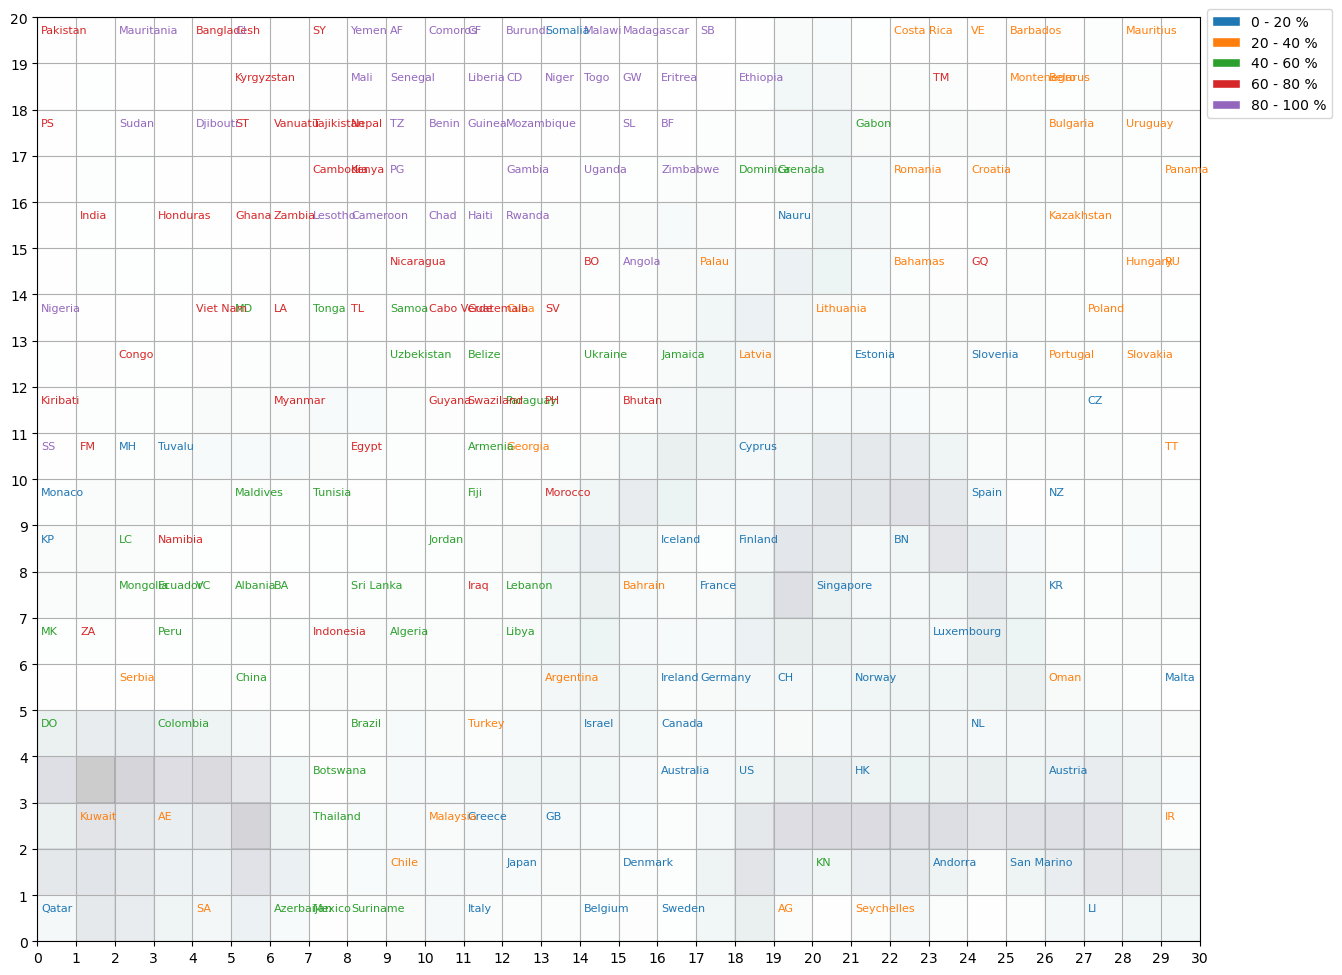

In [9]:
## Strategy - Most Frequent

data_imp = impute(data, "most_frequent")

target = (pd.DataFrame(data_imp).sort_values(1, ascending = False)[0].rank(method = 'min') - 1)//(len(data_imp)/N_clusters)+1

som = SOM(s_col, s_row, data_imp.T[2:].T)

country_map  = som.labels_map(data_imp.T[2:].T, data.iloc[:,1])

label_names = np.linspace(1,N_clusters, N_clusters).astype(str)
colors = ['C0', 'C1', 'C2', 'C3', 'C4']

HDI_Rank = data.join(pd.DataFrame(data_imp)[0])[['Country', 0]]
HDI_Rank['Cluster'] = (HDI_Rank.sort_values(0, ascending = True)[0].rank(method = 'min') - 1)//(len(data_imp)/N_clusters)+1

colors_dict = {c: str(colors[dm]) for c, dm in zip(HDI_Rank['Country'],
                                                (HDI_Rank['Cluster']).astype(int)-1)}

plt.figure(figsize=(15, 12))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha = 0.2)
for p, countries in country_map.items():
    countries = list(countries)
    x = p[0] + .1
    y = p[1] - .3
    for i, c in enumerate(countries):
        off_set = (i+1)/len(countries) - 0.05
        plt.text(x, y+off_set, shorten_country(c), color=colors_dict[c], 
                 fontsize=8)

plt.xticks(np.arange(s_col+1))
plt.yticks(np.arange(s_row+1))

plt.grid()

legend_elements = [Patch(facecolor=clr,
                         edgecolor='w',
                         label=l) for l, clr in category_color.items()]
plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, .95))

plt.savefig("Figures/SOM_MostFrequent.pdf", format="pdf", bbox_inches = "tight")

 [ 100000 / 100000 ] 100% - 0:00:00 left 
 quantization error: 5.564647469201821


c:\Users\Guilherme\Anaconda3\lib\site-packages\minisom.py:536: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)


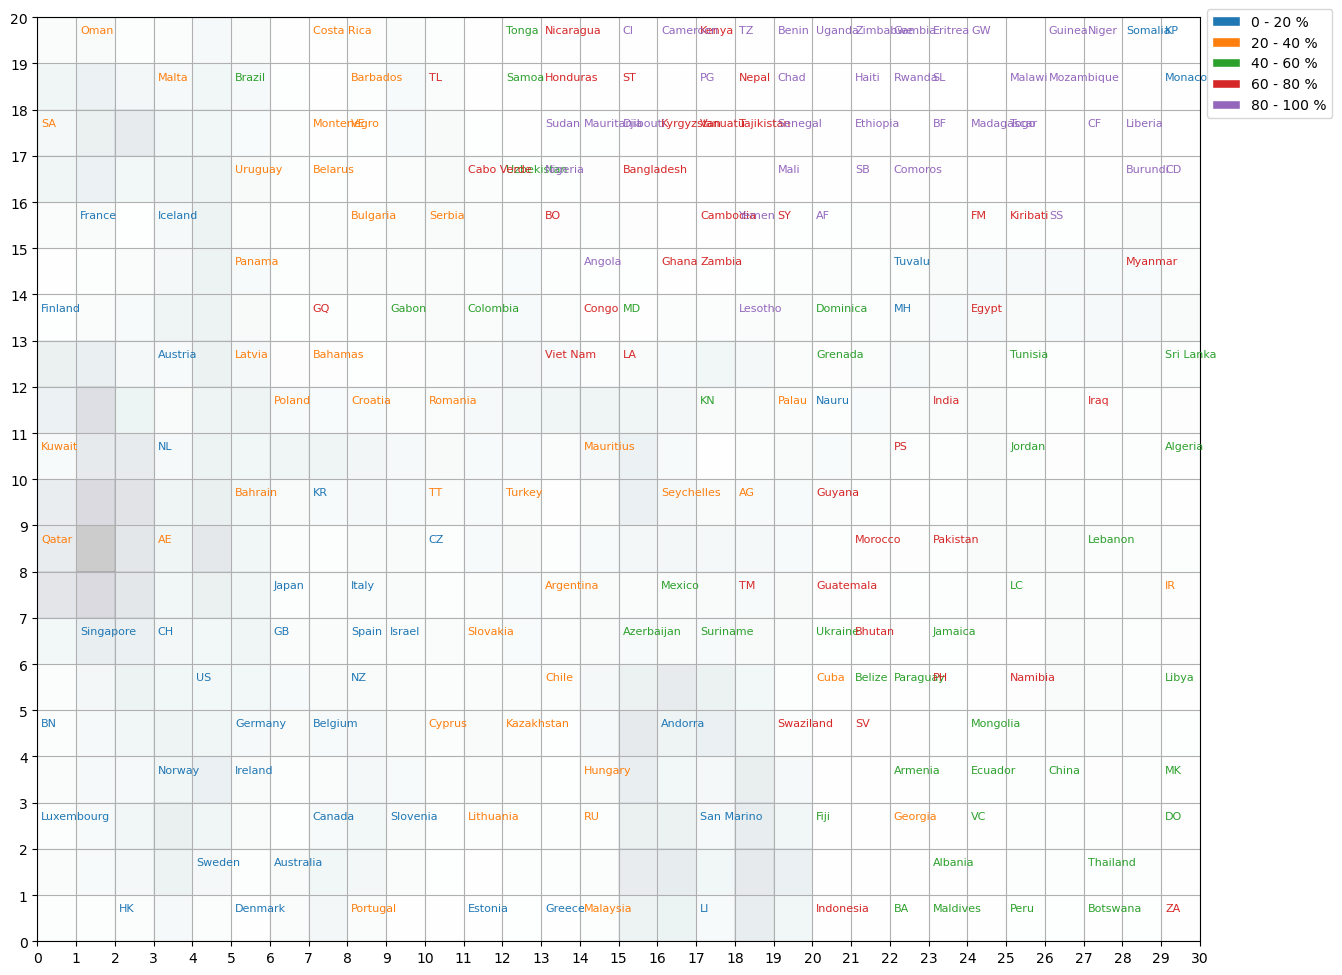

In [10]:
## Strategy - Constant

data_imp = impute(data, "constant")

target = (pd.DataFrame(data_imp).sort_values(1, ascending = False)[0].rank(method = 'min') - 1)//(len(data_imp)/N_clusters)+1

som = SOM(s_col, s_row, data_imp.T[2:].T)

country_map  = som.labels_map(data_imp.T[2:].T, data.iloc[:,1])

label_names = np.linspace(1,N_clusters, N_clusters).astype(str)
colors = ['C0', 'C1', 'C2', 'C3', 'C4']

HDI_Rank = data.join(pd.DataFrame(data_imp)[0])[['Country', 0]]
HDI_Rank['Cluster'] = (HDI_Rank.sort_values(0, ascending = True)[0].rank(method = 'min') - 1)//(len(data_imp)/N_clusters)+1

colors_dict = {c: str(colors[dm]) for c, dm in zip(HDI_Rank['Country'],
                                                (HDI_Rank['Cluster']).astype(int)-1)}

plt.figure(figsize=(15, 12))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha = 0.2)
for p, countries in country_map.items():
    countries = list(countries)
    x = p[0] + .1
    y = p[1] - .3
    for i, c in enumerate(countries):
        off_set = (i+1)/len(countries) - 0.05
        plt.text(x, y+off_set, shorten_country(c), color=colors_dict[c], 
                 fontsize=8)

plt.xticks(np.arange(s_col+1))
plt.yticks(np.arange(s_row+1))

plt.grid()

legend_elements = [Patch(facecolor=clr,
                         edgecolor='w',
                         label=l) for l, clr in category_color.items()]
plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, .95))

plt.savefig("Figures/SOM_Constant.pdf", format="pdf", bbox_inches = "tight")

c:\Users\Guilherme\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


 [ 100000 / 100000 ] 100% - 0:00:00 left 
 quantization error: 7.972311529466947


c:\Users\Guilherme\Anaconda3\lib\site-packages\minisom.py:536: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)


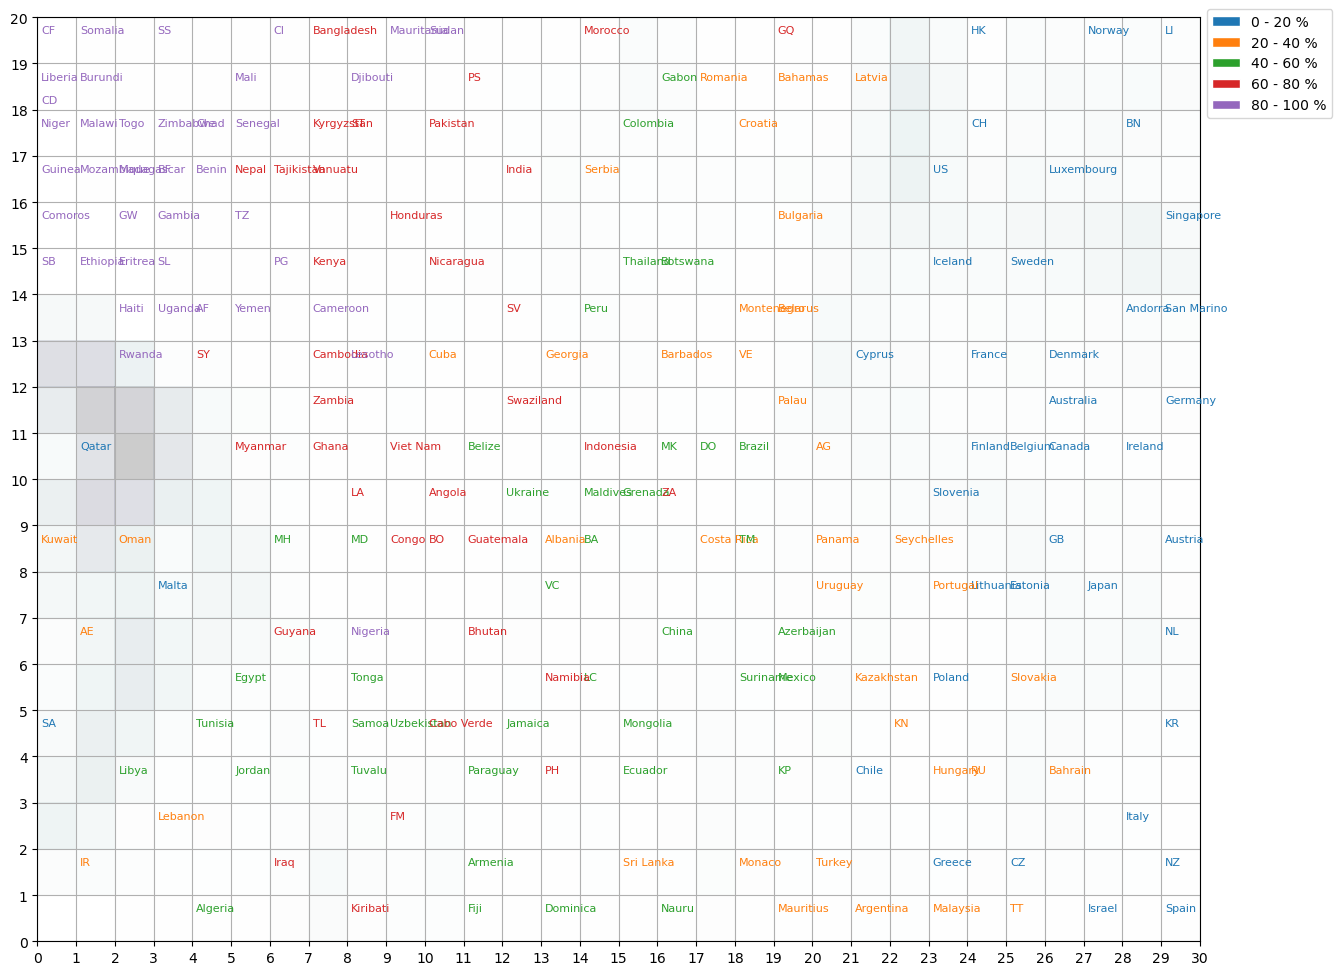

In [11]:
## Strategy - Interactive

data_imp = impute(data, "Interactive")

target = (pd.DataFrame(data_imp).sort_values(1, ascending = False)[0].rank(method = 'min') - 1)//(len(data_imp)/N_clusters)+1

som = SOM(s_col,s_row, data_imp.T[2:].T)

country_map  = som.labels_map(data_imp.T[2:].T, data.iloc[:,1])

label_names = np.linspace(1,N_clusters, N_clusters).astype(str)
colors = ['C0', 'C1', 'C2', 'C3', 'C4']

HDI_Rank = data.join(pd.DataFrame(data_imp)[0])[['Country', 0]]
HDI_Rank['Cluster'] = (HDI_Rank.sort_values(0, ascending = True)[0].rank(method = 'min') - 1)//(len(data_imp)/N_clusters)+1

colors_dict = {c: str(colors[dm]) for c, dm in zip(HDI_Rank['Country'],
                                                (HDI_Rank['Cluster']).astype(int)-1)}

plt.figure(figsize=(15, 12))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha = 0.2)
for p, countries in country_map.items():
    countries = list(countries)
    x = p[0] + .1
    y = p[1] - .3
    for i, c in enumerate(countries):
        off_set = (i+1)/len(countries) - 0.05
        plt.text(x, y+off_set, shorten_country(c), color=colors_dict[c], 
                 fontsize=8)

plt.xticks(np.arange(s_col+1))
plt.yticks(np.arange(s_row+1))

plt.grid()

legend_elements = [Patch(facecolor=clr,
                         edgecolor='w',
                         label=l) for l, clr in category_color.items()]
plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, .95))

plt.savefig("Figures/SOM_Interactive.pdf", format="pdf", bbox_inches = "tight")

c:\Users\Guilherme\Anaconda3\lib\site-packages\minisom.py:384: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[:, pc_order[0]] + \


 [ 100000 / 100000 ] 100% - 0:00:00 left 
 quantization error: 2.6305459037510585e-05


c:\Users\Guilherme\Anaconda3\lib\site-packages\minisom.py:536: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)


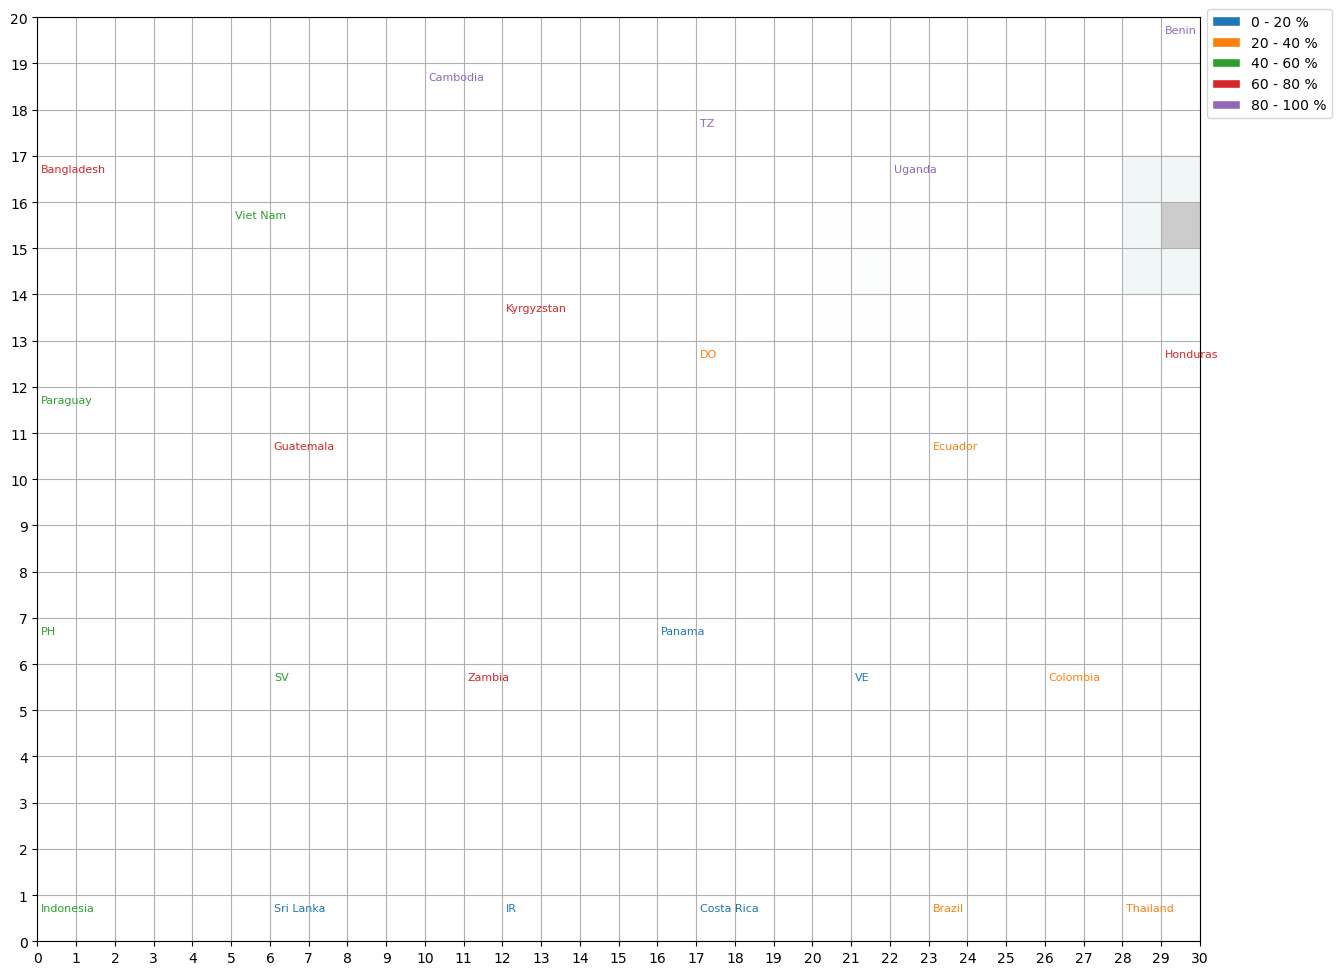

In [12]:
## Strategy - Delete rows

data_imp = impute(data, "Delete_rows")

target = (pd.DataFrame(data_imp).sort_values(1, ascending = False)[0].rank(method = 'min') - 1)//(len(data_imp)/N_clusters)+1

som = SOM(s_col, s_row, data_imp.T[2:].T)

country_map  = som.labels_map(data_imp.T[2:].T, data.dropna(axis = 0).iloc[:,1])

label_names = np.linspace(1,N_clusters, N_clusters).astype(str)
colors = ['C0', 'C1', 'C2', 'C3', 'C4']

HDI_Rank = data.dropna().join(pd.DataFrame(data_imp, index = data.dropna().index)[0])[['Country', 0]]
HDI_Rank['Cluster'] = (HDI_Rank.sort_values(0, ascending = True)[0].rank(method = 'min') - 1)//(len(data_imp)/N_clusters)+1

colors_dict = {c: str(colors[dm]) for c, dm in zip(HDI_Rank['Country'],
                                                (HDI_Rank['Cluster']).astype(int)-1)}

plt.figure(figsize=(15, 12))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha = 0.2)
for p, countries in country_map.items():
    countries = list(countries)
    x = p[0] + .1
    y = p[1] - .3
    for i, c in enumerate(countries):
        off_set = (i+1)/len(countries) - 0.05
        plt.text(x, y+off_set, shorten_country(c), color=colors_dict[c], 
                 fontsize=8)

plt.xticks(np.arange(s_col+1))
plt.yticks(np.arange(s_row+1))

plt.grid()

legend_elements = [Patch(facecolor=clr,
                         edgecolor='w',
                         label=l) for l, clr in category_color.items()]
plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, .95))

plt.savefig("Figures/SOM_Rows.pdf", format="pdf", bbox_inches = "tight")

 [ 100000 / 100000 ] 100% - 0:00:00 left 
 quantization error: 0.007151364509190563


c:\Users\Guilherme\Anaconda3\lib\site-packages\minisom.py:536: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)


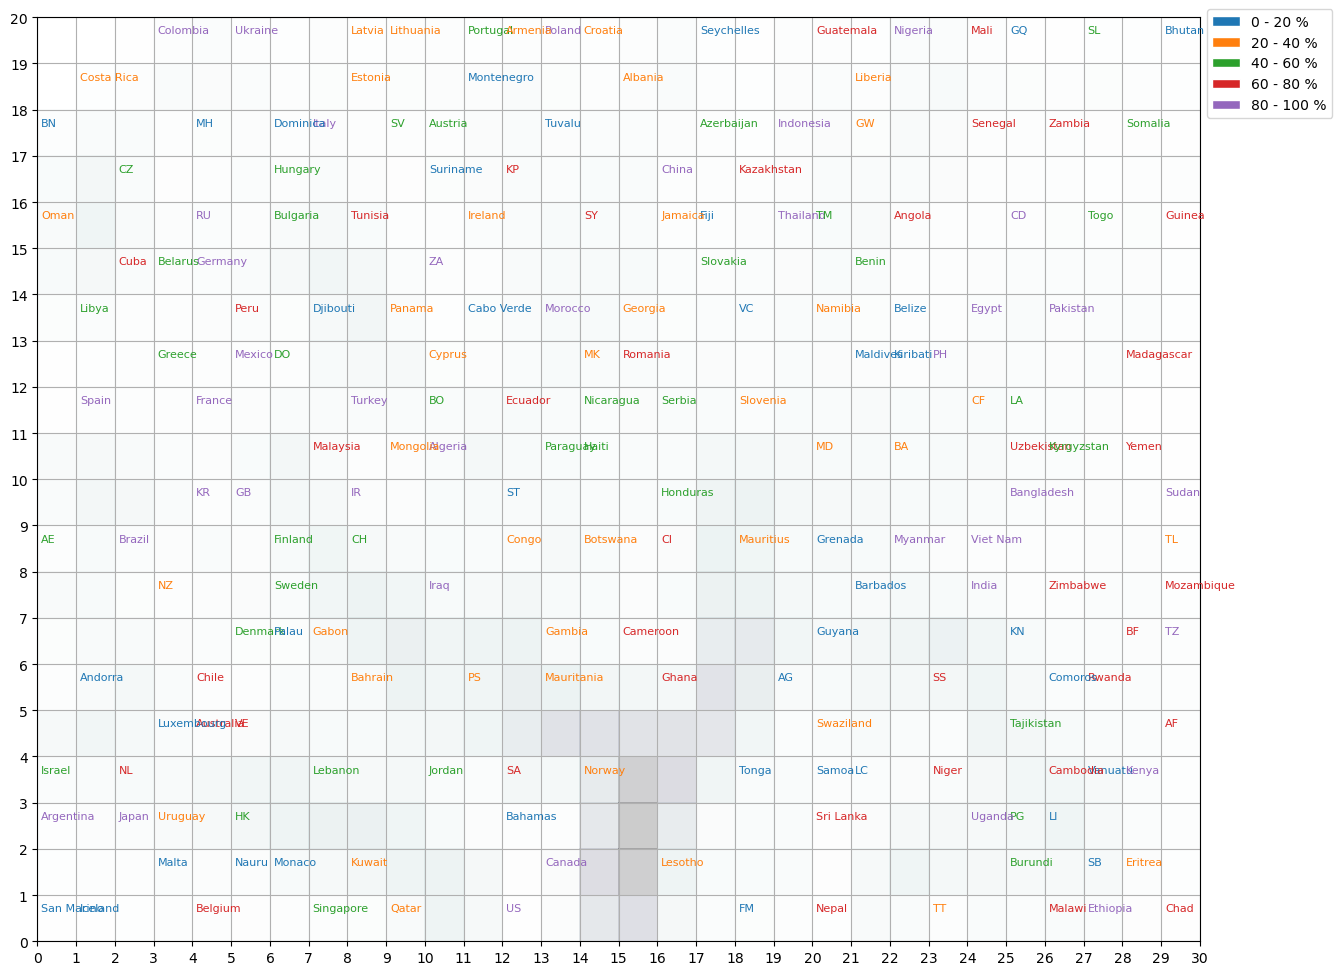

In [13]:
## Strategy - Delete coluns

data_imp = impute(data, "Delete_columns")

target = (pd.DataFrame(data_imp).sort_values(1, ascending = False)[0].rank(method = 'min') - 1)//(len(data_imp)/N_clusters)+1

som = SOM(s_col, s_row, data_imp.T[2:].T)

country_map  = som.labels_map(data_imp.T[2:].T, data.dropna(axis = 1).iloc[:,1])

label_names = np.linspace(1,N_clusters, N_clusters).astype(str)
colors = ['C0', 'C1', 'C2', 'C3', 'C4']

HDI_Rank = data.dropna(axis = 1).join(pd.DataFrame(data_imp, index = data.dropna(axis = 1).index)[0])[['Country', 0]]
HDI_Rank['Cluster'] = (HDI_Rank.sort_values(0, ascending = True)[0].rank(method = 'min') - 1)//(len(data_imp)/N_clusters)+1

colors_dict = {c: str(colors[dm]) for c, dm in zip(HDI_Rank['Country'],
                                                (HDI_Rank['Cluster']).astype(int)-1)}

plt.figure(figsize=(15, 12))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha = 0.2)
for p, countries in country_map.items():
    countries = list(countries)
    x = p[0] + .1
    y = p[1] - .3
    for i, c in enumerate(countries):
        off_set = (i+1)/len(countries) - 0.05
        plt.text(x, y+off_set, shorten_country(c), color=colors_dict[c], 
                 fontsize=8)

plt.xticks(np.arange(s_col+1))
plt.yticks(np.arange(s_row+1))

plt.grid()

legend_elements = [Patch(facecolor=clr,
                         edgecolor='w',
                         label=l) for l, clr in category_color.items()]
plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, .95))

plt.savefig("Figures/SOM_Columns.pdf", format="pdf", bbox_inches = "tight")